<a href="https://colab.research.google.com/github/sanskriti456/Trex17/blob/main/logreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Iteration 0, Cost = 0.6931
Iteration 100, Cost = 0.3597
Iteration 200, Cost = 0.3381
Iteration 300, Cost = 0.3309
Iteration 400, Cost = 0.3272
Iteration 500, Cost = 0.3250
Iteration 600, Cost = 0.3234
Iteration 700, Cost = 0.3223
Iteration 800, Cost = 0.3214
Iteration 900, Cost = 0.3207

Final parameters (first 10 shown):
[-2.00890688  0.3400532   0.06566532  0.41446233  1.43902919  0.23306876
  0.36633288  0.147965    0.03423199 -0.02216003]


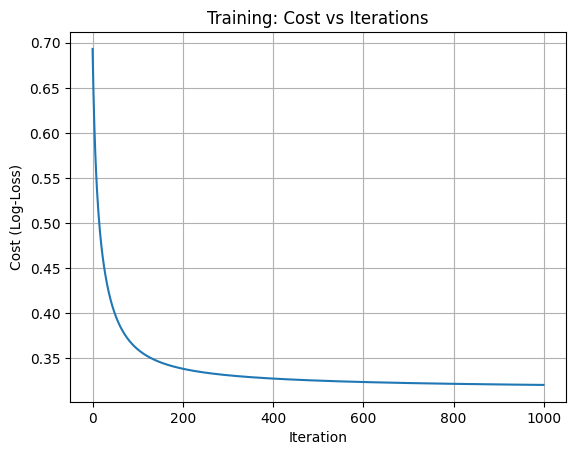

Plotting cost sensitivity for parameter indices: [ 4 31 52]


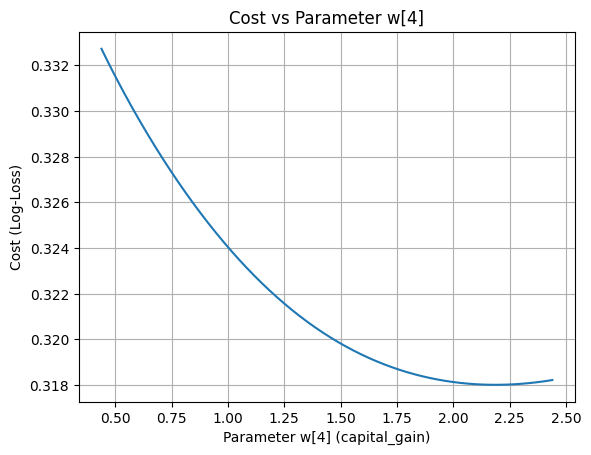

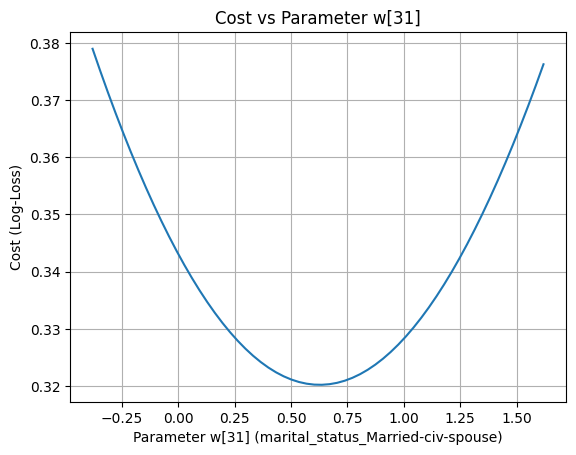

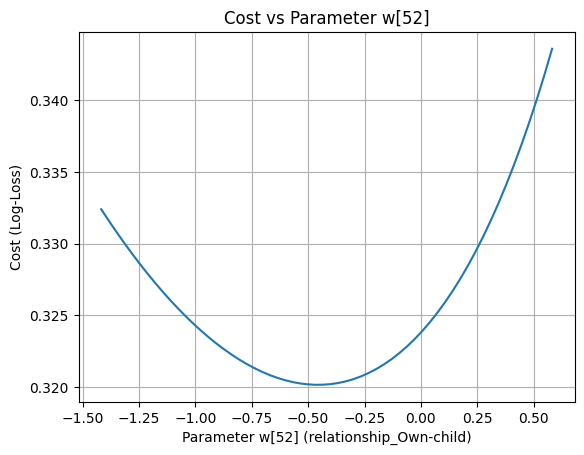

Training accuracy: 85.17%
Test accuracy: 85.58%


In [ ]:
# ================================
# Logistic Regression (from scratch) — Full Implementation
# Using UCI Adult Income Dataset
# ================================

# 0) Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1) Load / prepare data
# we want to predict income

# --------------------------------------------------
def load_data(data_path="/content/drive/MyDrive/adult.data"):
    columns = [
        "age", "workclass", "fnlwgt", "education", "education_num",
        "marital_status", "occupation", "relationship", "race", "sex",
        "capital_gain", "capital_loss", "hours_per_week", "native_country",
        "income"
    ]
    df = pd.read_csv(data_path, header=None, names=columns,
                     na_values=" ?", skipinitialspace=True)

    # Clean target labels
    df["income"] = df["income"].str.strip()

    # Drop rows with missing values
    df = df.dropna()

    # One-hot encode categorical vars
    X = pd.get_dummies(df.drop("income", axis=1), drop_first=True)
    y = (df["income"] == ">50K").astype(int).values

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y
    )

    # Add bias column
    X_train = np.column_stack([np.ones(X_train.shape[0]), X_train])
    X_test  = np.column_stack([np.ones(X_test.shape[0]), X_test])

    return X_train, X_test, y_train, y_test, X.columns

# Load data
X_train, X_test, y_train, y_test, feature_names = load_data()
m, n_with_bias = X_train.shape

# 2) Utility functions: sigmoid, loss, gradient, prediction
# --------------------------------------------------
#logistic regression - squash numbers between 0 and 1

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#predicts probability of income>50k for each row
def predict_proba(X, w):
    return sigmoid(X @ w)

#compute log loss between predicted possibilities and true labels (cost function for logistic regression)
def binary_cross_entropy(y_true, y_prob, eps=1e-12):
    y_prob = np.clip(y_prob, eps, 1 - eps)
    return -np.mean(y_true*np.log(y_prob) + (1-y_true)*np.log(1-y_prob))

#computes gradient (slope of costs with respect to weights)
#used to update weights in gradient descent
def gradient(X, y_true, y_prob):
    m = len(y_true)
    return (1/m) * X.T @ (y_prob - y_true)

# 3) Initialize parameters
# --------------------------------------------------
w = np.zeros(n_with_bias)

# 4) Hyperparameters
# --------------------------------------------------
learning_rate = 0.1
num_iterations = 1000
cost_history = []

# 5) Gradient Descent loop
# --------------------------------------------------
for i in range(num_iterations):
    # Forward pass
    y_prob = predict_proba(X_train, w)

    # Compute loss
    cost = binary_cross_entropy(y_train, y_prob)
    cost_history.append(cost)

    # Backward pass
    grad = gradient(X_train, y_train, y_prob)

    # Parameter update
    w -= learning_rate * grad

    if i % 100 == 0:
        print(f"Iteration {i}, Cost = {cost:.4f}")

# 6) Final parameters
# --------------------------------------------------
print("\nFinal parameters (first 10 shown):")
print(w[:10])

# 7) Plot: Cost vs Iterations
# --------------------------------------------------
plt.figure()
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost (Log-Loss)")
plt.title("Training: Cost vs Iterations")
plt.grid(True)
plt.show()

# 8) Plot: Cost vs 3 of the most important parameters
# --------------------------------------------------
param_indices = np.argsort(np.abs(w[1:]))[::-1][:3] + 1  # skip bias
print("Plotting cost sensitivity for parameter indices:", param_indices)

def compute_cost_given_w(mod_w):
    y_hat_mod = predict_proba(X_train, mod_w)
    return binary_cross_entropy(y_train, y_hat_mod)

for idx in param_indices:
    center = w[idx]
    sweep = np.linspace(center - 1.0, center + 1.0, 60)
    costs = []
    for val in sweep:
        w_tmp = w.copy()
        w_tmp[idx] = val
        costs.append(compute_cost_given_w(w_tmp))

    plt.figure()
    plt.plot(sweep, costs)
    plt.xlabel(f"Parameter w[{idx}] ({feature_names[idx-1]})")
    plt.ylabel("Cost (Log-Loss)")
    plt.title(f"Cost vs Parameter w[{idx}]")
    plt.grid(True)
    plt.show()

# 9) (Optional) Inference helper
# --------------------------------------------------
def predict_label(X_new, w, threshold=0.5):
    return (predict_proba(X_new, w) >= threshold).astype(int)

# Evaluate accuracy
train_acc = (predict_label(X_train, w) == y_train).mean()
test_acc  = (predict_label(X_test, w)  == y_test).mean()
print(f"Training accuracy: {train_acc*100:.2f}%")
print(f"Test accuracy: {test_acc*100:.2f}%")
